In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

In [120]:
cats_raw = pd.read_csv('aac_shelter_cat_outcome_eng.csv')

In [121]:
print(len(cats_raw))

29421


In [122]:
cats_raw.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')

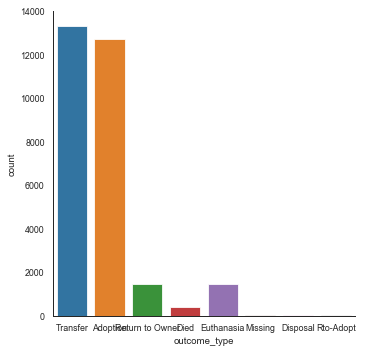

In [123]:
# frequency plot of outcomes
sns.set_style("white")
sns.set_context("paper")
sns.catplot(data = cats_raw, x = "outcome_type", kind="count")

In [124]:
# We are only interested in whether the cat was adopted or not
# Add a new column for adopted yes/no
cats_raw['adopted'] = np.where(cats_raw['outcome_type'] == 'Adoption', "Yes", "No")

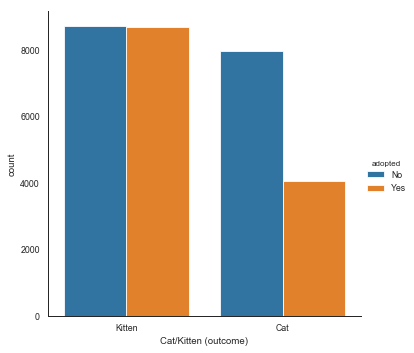

In [125]:
# Outcome by Cat/Kitten
sns.catplot(data = cats_raw, x = "Cat/Kitten (outcome)", kind = "count", hue = "adopted")

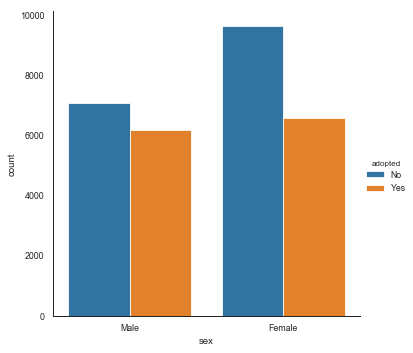

In [126]:
# Outcome by Sex
sns.catplot(data = cats_raw, x = "sex", kind = "count", hue = "adopted")

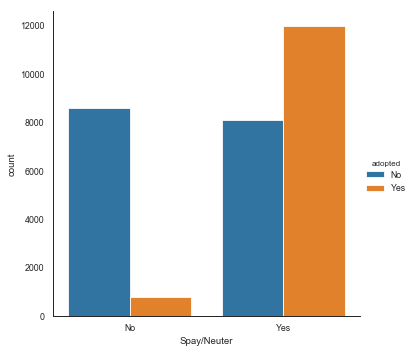

In [127]:
# Outcome by spay/neuter
sns.catplot(data = cats_raw, x = "Spay/Neuter", kind = "count", hue = "adopted")

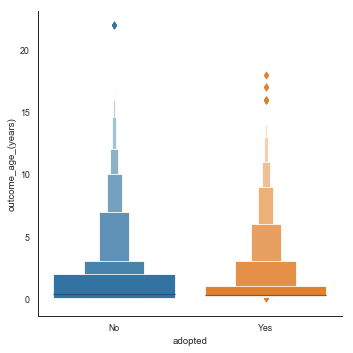

In [128]:
# Outcome ages
sns.catplot(data = cats_raw, x = "adopted", y = "outcome_age_(years)", kind = "boxen")

In [129]:
import statsmodels.discrete.discrete_model as sm

In [130]:
interest = cats_raw.loc[:, ['sex', 'Spay/Neuter', 'Cat/Kitten (outcome)', 'outcome_age_(years)', 'adopted']]
interest.head()

,sex,Spay/Neuter,Cat/Kitten (outcome),outcome_age_(years),adopted
0,Male,No,Kitten,0.038356,No
1,Female,No,Kitten,0.082192,Yes
2,Female,Yes,Kitten,0.246575,Yes
3,Female,Yes,Cat,1.000000,No
4,Male,No,Kitten,0.057534,No


In [131]:
interest_dummy = pd.get_dummies(interest)
interest_dummy['Intercept'] = 1.0
interest_dummy.head()

,outcome_age_(years),sex_Female,sex_Male,Spay/Neuter_No,Spay/Neuter_Yes,Cat/Kitten (outcome)_Cat,Cat/Kitten (outcome)_Kitten,adopted_No,adopted_Yes,Intercept
0,0.038356,0,1,1,0,0,1,1,0,1.0
1,0.082192,1,0,1,0,0,1,0,1,1.0
2,0.246575,1,0,0,1,0,1,0,1,1.0
3,1.000000,1,0,0,1,1,0,1,0,1.0
4,0.057534,0,1,1,0,0,1,1,0,1.0


In [132]:
interest_dummy = interest_dummy.astype(float)
interest_dummy.head()

,outcome_age_(years),sex_Female,sex_Male,Spay/Neuter_No,Spay/Neuter_Yes,Cat/Kitten (outcome)_Cat,Cat/Kitten (outcome)_Kitten,adopted_No,adopted_Yes,Intercept
0,0.038356,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.082192,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.246575,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.057534,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [133]:
model = sm.Logit(interest_dummy.loc[:, ['adopted_Yes']], 
                 interest_dummy.loc[:, ['Intercept',
                                        'Cat/Kitten (outcome)_Kitten',
                                        'Spay/Neuter_Yes',
                                        'sex_Male',
                                        'outcome_age_(years)']])

In [134]:
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.507140
         Iterations 6


In [135]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:            adopted_Yes   No. Observations:                29421
Model:                          Logit   Df Residuals:                    29416
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Apr 2019   Pseudo R-squ.:                  0.2586
Time:                        22:12:28   Log-Likelihood:                -14921.
converged:                       True   LL-Null:                       -20126.
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.7204      0.053    -69.951      0.000      -3.825      -3.616
Cat/Kitten (outcome)_Kitten     1.2971      0.035     36.888      0.000       1.